<center><h1><b>Crime Data Processing</b></h1></center>

In [53]:
import matplotlib.pyplot as plt

In [54]:
import pandas as pd

# Load fresh data
df_2019 = pd.read_excel("Part 1 - Offence Data - Theft - 2019.xlsx")
df_2019['Owning Borough'] = df_2019['Owning Borough'].astype(str).str.strip()

# Final target codes 
target_codes = ['BS', 'EK', 'CW', 'JI', 'WW', 'LX', 'FH', 'NI', 'TW', 'RG', 'GD', 'SX', 'YE']

# Filter
filtered_df_2019 = df_2019[df_2019['Owning Borough'].isin(target_codes)].copy()

# Double-check CW
print("CW count before filtering:", df_2019[df_2019['Owning Borough'] == 'CW'].shape[0])
print("CW count after filtering:", filtered_df_2019[filtered_df_2019['Owning Borough'] == 'CW'].shape[0])


CW count before filtering: 50918
CW count after filtering: 50918


In [55]:
# Load fresh data
df_2020 = pd.read_excel("Part 1 - Offence Data - Theft - 2020.xlsx")
df_2020['Owning Borough'] = df_2020['Owning Borough'].astype(str).str.strip()

# Final target codes (you were right)
target_codes = ['BS', 'EK', 'CW', 'JI', 'WW', 'LX', 'FH', 'NI', 'TW', 'RG', 'GD', 'SX', 'YE']

# Filter
filtered_df_2020 = df_2020[df_2020['Owning Borough'].isin(target_codes)].copy()

# Double-check CW
print("CW count before filtering:", df_2020[df_2020['Owning Borough'] == 'CW'].shape[0])
print("CW count after filtering:", filtered_df_2020[filtered_df_2020['Owning Borough'] == 'CW'].shape[0])

CW count before filtering: 24030
CW count after filtering: 24030


In [56]:
# List of 13 target borough codes
target_codes = ['BS', 'EK', 'CW', 'JI', 'WW', 'LX', 'FH', 'NI', 'TW', 'RG', 'GD', 'SX', 'YE']

# Extract unique boroughs in each filtered dataset
boroughs_2019 = filtered_df_2019['Owning Borough'].unique().tolist()
boroughs_2020 = filtered_df_2020['Owning Borough'].unique().tolist()

# Convert to sets for comparison
set_2019 = set(boroughs_2019)
set_2020 = set(boroughs_2020)
target_set = set(target_codes)

# Check which boroughs are missing 
missing_2019 = target_set - set_2019
missing_2020 = target_set - set_2020

# Output results
print("Missing boroughs in 2019:", missing_2019 if missing_2019 else "None — all 13 present")
print("Missing boroughs in 2020:", missing_2020 if missing_2020 else "None — all 13 present")

Missing boroughs in 2019: None — all 13 present
Missing boroughs in 2020: None — all 13 present


In [57]:
# Combine the filtered DataFrames
combined_df = pd.concat([filtered_df_2019, filtered_df_2020], ignore_index=True)

In [58]:
# Convert datetime column to proper format
combined_df['SUPV CR Recorded DateTime'] = pd.to_datetime(combined_df['SUPV CR Recorded DateTime'])

In [59]:
# Sort by datetime
combined_df = combined_df.sort_values(by='SUPV CR Recorded DateTime').reset_index(drop=True)

In [60]:
# Preview the result
combined_df.head()

,SUPV CR Recorded DateTime,GEN Reported DateTime,GEN Committed on/from DateTime,CLASS Minor,Owning Borough,VEN Address Grid Ref,IO Duty Desc,How Police Notified
0,2019-01-01 00:08:18,2018-12-31 23:53:39,2018-12-31 23:00:00,Other Theft,EK,"530125,182875",Borough Uniform,Phone Call to Police
1,2019-01-01 00:16:36,2019-01-01 00:06:38,2018-12-31 17:10:00,Other Theft,FH,"523171,180190",TP Central Unit,Phone Call to Police
2,2019-01-01 00:28:16,2019-01-01 00:16:31,2018-12-31 23:30:00,Other Theft,CW,"530341,186566",TP Central Unit,Internet Reporting
3,2019-01-01 00:34:11,2018-12-31 23:45:00,2018-12-31 23:20:00,Other Theft Person,CW,"529520,180609",Other duty(Uniform),Found By Police
4,2019-01-01 00:39:07,2019-01-01 00:36:00,2018-12-31 21:00:00,Other Theft Person,CW,"529654,181358",Other duty(Uniform),Caller At Station


In [61]:
# Define cutoff datetime 
cutoff_date = pd.to_datetime("2020-06-30 23:59:59")

In [62]:
# Filter the combined dataset to include only records on or before June 30, 2020
combined_df = combined_df[combined_df['SUPV CR Recorded DateTime'] <= cutoff_date].reset_index(drop=True)

In [63]:
# Preview the result
combined_df.tail()

,SUPV CR Recorded DateTime,GEN Reported DateTime,GEN Committed on/from DateTime,CLASS Minor,Owning Borough,VEN Address Grid Ref,IO Duty Desc,How Police Notified
260744,2020-06-30 23:46:36,2020-06-30 23:36:31,2020-06-27 23:59:00,Theft/Taking of M/V,CW,"525061,181509",TP Central Unit,Internet Reporting
260745,2020-06-30 23:50:18,2020-06-30 23:36:02,2020-06-30 21:40:00,Theft From Shops,CW,"527538,181236",Borough Uniform,Phone Call to Police
260746,2020-06-30 23:50:24,2020-06-30 23:32:18,2020-06-27 07:00:00,Theft From M/V,BS,"526002,179549",TP Central Unit,Internet Reporting
260747,2020-06-30 23:52:37,2020-06-30 23:48:49,2020-06-30 19:51:00,Theft/Taking of M/V,EK,"524010,185494",Borough Uniform,Phone Call to Police
260748,2020-06-30 23:54:16,2020-06-30 23:48:00,2020-06-30 22:10:00,Other Theft Person,CW,"528786,181790",Borough Uniform,Phone Call to Police


In [64]:
# Map borough codes to full names 
borough_code_map = {
    'BS': 'Kensington and Chelsea',
    'CW': 'Westminster',
    'EK': 'Camden',
    'JI': 'City of London',
    'WW': 'Wandsworth',
    'LX': 'Lambeth',
    'FH': 'Hammersmith and Fulham',
    'NI': 'Islington',
    'TW': 'Tower Hamlets',
    'RG': 'Greenwich',
    'GD': 'Hackney',
    'SX': 'Southwark',
    'YE': 'Lewisham'
}

In [65]:
# Map readable names
combined_df['Borough Name'] = combined_df['Owning Borough'].map(borough_code_map)

In [66]:
# Extract date only 
combined_df['Date'] = pd.to_datetime(combined_df['SUPV CR Recorded DateTime']).dt.date

In [67]:
# Group by date and borough, then pivot
pivot_df = combined_df.groupby(['Date', 'Borough Name']).size().unstack(fill_value=0).reset_index()

In [68]:
# Add total crimes column
pivot_df['Total Crimes'] = pivot_df.iloc[:, 1:].sum(axis=1)

In [69]:
# Show result
pivot_df.tail()

Borough Name,Date,Camden,City of London,Greenwich,Hackney,Hammersmith and Fulham,Islington,Kensington and Chelsea,Lambeth,Lewisham,Southwark,Tower Hamlets,Wandsworth,Westminster,Total Crimes
542,2020-06-26,23,22,21,26,7,30,27,13,22,29,12,25,45,302
543,2020-06-27,20,20,16,31,13,16,16,14,19,15,12,21,40,253
544,2020-06-28,18,11,12,30,14,19,9,24,21,14,5,18,34,229
545,2020-06-29,33,25,21,47,14,23,17,29,29,20,10,27,44,339
546,2020-06-30,34,16,23,28,19,13,14,27,28,16,16,31,28,293


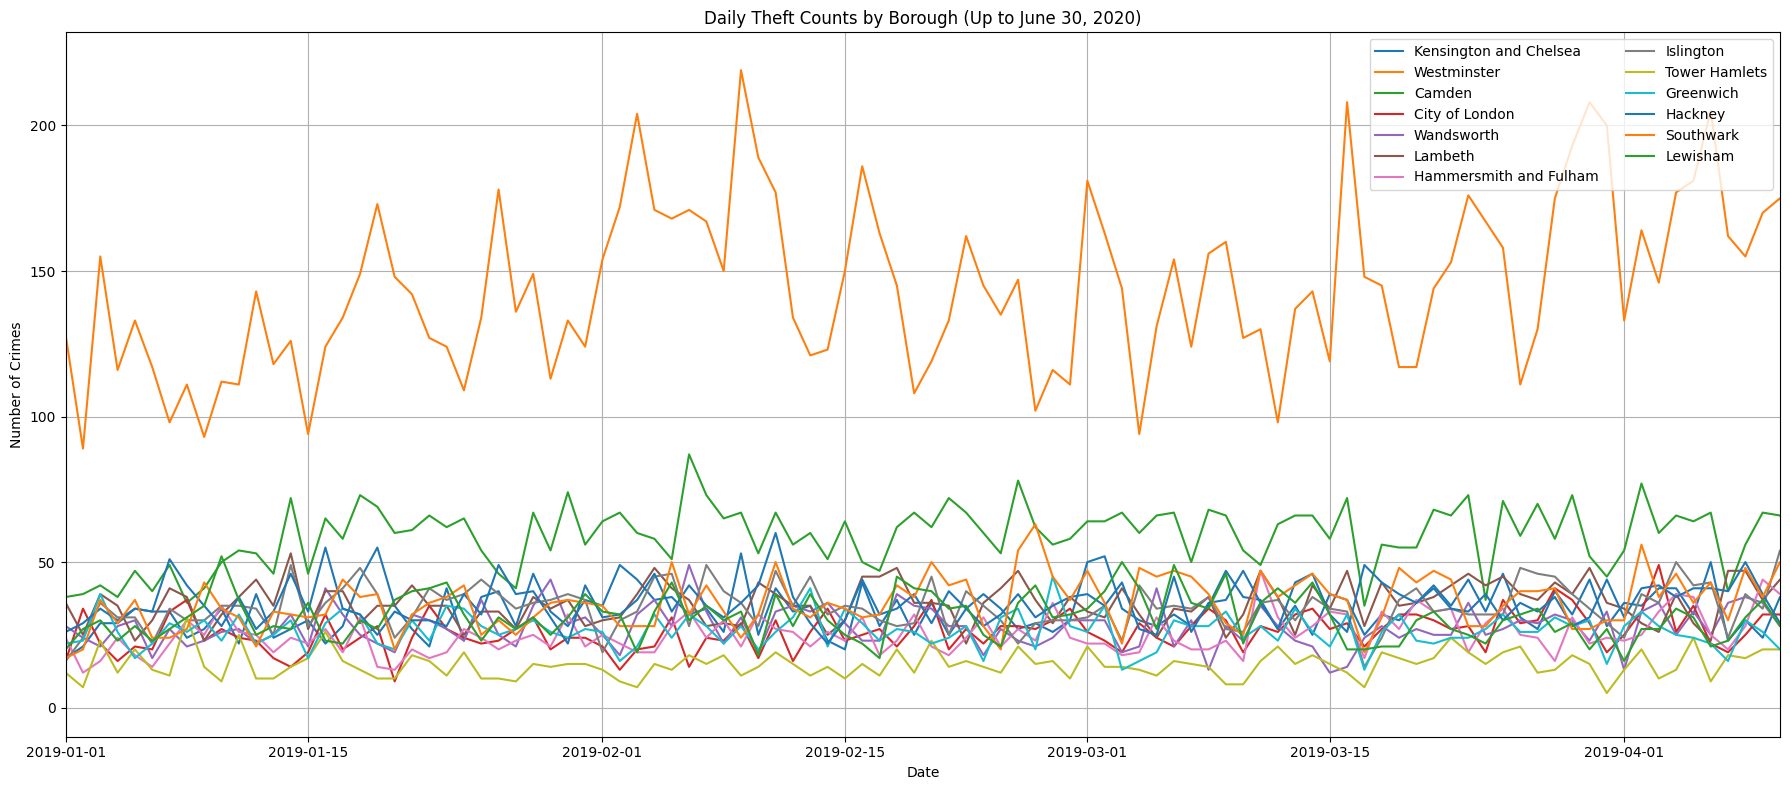

In [70]:
# Set plot size
plt.figure(figsize=(18, 8))

# Plot each borough
for borough in borough_code_map.values():
    if borough in pivot_df.columns:
        plt.plot(pivot_df['Date'], pivot_df[borough], label=borough)

# Customize plot
plt.title("Daily Theft Counts by Borough (Up to June 30, 2020)")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.legend(loc='upper right', ncol=2)
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.xlim(pivot_df['Date'].iloc[0], pivot_df['Date'].iloc[99])
plt.show()

In [71]:
pivot_df.to_csv("Theft.csv", index=False)